In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
import seaborn as sns

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
N = 1000
x1 = np.random.normal(0,1,size=N)
x2 = x1 + np.random.normal(0,3,size=N)
x3 = 2*x1 + x2
X = np.array([x1,x2,x3])

In [3]:
cov = np.cov(X)
l, V = np.linalg.eig(cov)
print ("Numpy eig:\n")
print ("eigenvalues:",l)
print ("eigenvectors:",V)

Numpy eig:

eigenvalues: [2.67256507e+01 2.80396506e-16 2.05384850e+00]
eigenvectors: [[-0.11278947 -0.81649658  0.56622599]
 [-0.58069291 -0.40824829 -0.70436431]
 [-0.80627184  0.40824829  0.42808767]]


In [4]:
U, spectrum, Vt = np.linalg.svd(X)
l_svd = spectrum**2/(N-1)
V_svd = U
print ("\nSVD\n")
print ("eigenvalues:",l_svd)
print ("eigenvectors:",V_svd)


SVD

eigenvalues: [2.67258330e+01 2.05469869e+00 7.13066350e-32]
eigenvectors: [[-0.1127985   0.56622419 -0.81649658]
 [-0.58068167 -0.70437357 -0.40824829]
 [-0.80627867  0.4280748   0.40824829]]


In [106]:
Lambda=np.diag(l_svd)
print ("Lambda {}".format(Lambda))
#cov matrix Trace
print ("Covariance trace:", cov.trace())
#lambda trace
print ("Lambda trace:", Lambda.trace())
print ("Percentage: {}".format(Lambda[0,0]/Lambda.trace()))

Lambda [[2.61551350e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.05073873e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.93674100e-30]]
Covariance trace: 28.205595896235543
Lambda trace: 28.20587377162835
Percentage: 0.9272939122960291


In [107]:
Lambda=np.diag(l_svd[0:2])
print ("Lambda {}".format(Lambda))
#cov matrix Trace
print ("Covariance trace:", cov.trace())
#lambda trace
print ("Lambda trace:", Lambda.trace())

print ("Percentage explained by the first PC: {}".format(Lambda[0,0]/Lambda.trace()))
print ("Total variability: {}".format((l_svd[0]+l_svd[1])/sum(l_svd)))

Lambda [[26.15513504  0.        ]
 [ 0.          2.05073873]]
Covariance trace: 28.205595896235543
Lambda trace: 28.20587377162835
Percentage explained by the first PC: 0.9272939122960291
Total variability: 1.0


In [108]:
Xp = np.dot(X.T, U).T

Text(0.5, 1.0, 'new 2 vs 3')

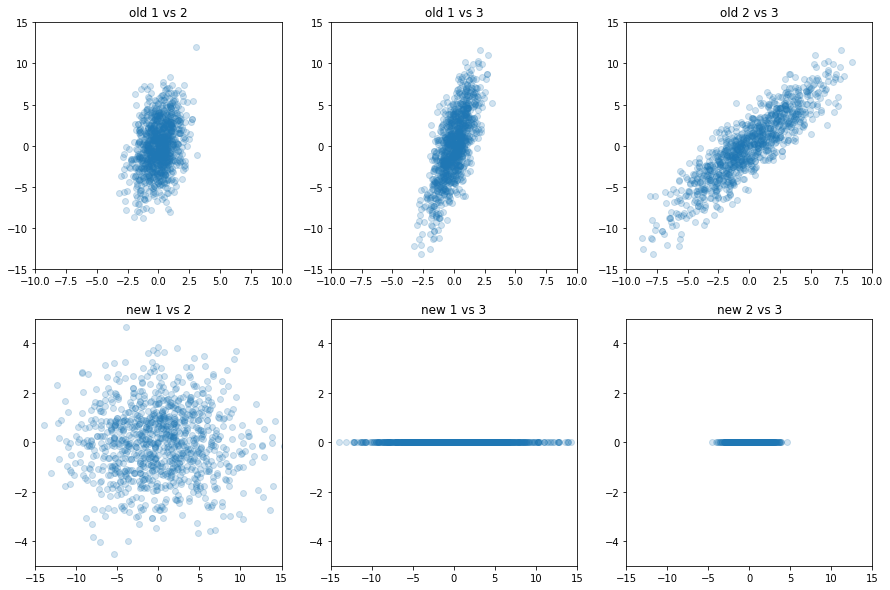

In [109]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax1[0].scatter(X[0,:],X[1,:], alpha=0.2)
ax1[1].scatter(X[0,:],X[2,:], alpha=0.2)
ax1[2].scatter(X[1,:],X[2,:], alpha=0.2)

ax2[0].scatter(Xp[0,:],Xp[1,:], alpha=0.2)
ax2[1].scatter(Xp[0,:],Xp[2,:], alpha=0.2)
ax2[2].scatter(Xp[1,:],Xp[2,:], alpha=0.2)

for j in range(0,3):
    #not same axis limit to get some comparison with seaborn
    ax1[j].axis([-10,10,-15,15])
    ax2[j].axis([-15,15,-5,5])
    
ax1[0].set_title("old {} vs {}".format(1,2))
ax2[0].set_title("new {} vs {}".format(1,2))
ax1[1].set_title("old {} vs {}".format(1,3))
ax2[1].set_title("new {} vs {}".format(1,3))
ax1[2].set_title("old {} vs {}".format(2,3))
ax2[2].set_title("new {} vs {}".format(2,3))

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [110]:
df = X.copy()

In [111]:
noise = np.random.normal(0,1/20, size=(N,10,3)).sum(axis=1)
df += noise.T

In [112]:
cov = np.cov(df, rowvar=False)
l, V = np.linalg.eig(cov)
print ("Covariance:{}\n".format(cov))
print ("Numpy eig:\n")
print ("eigenvalues:",l)
print ("eigenvectors:",V)

Covariance:[[ 1.63553220e+00 -2.18251579e+00 -1.88874611e+00 ...  3.28332714e-02
   9.42650656e-01  9.94755571e-02]
 [-2.18251579e+00  3.44696180e+00  2.39882557e+00 ... -2.12283303e-01
  -5.17700404e-01 -5.61081109e-01]
 [-1.88874611e+00  2.39882557e+00  2.20882015e+00 ...  4.04794046e-04
  -1.25696571e+00 -1.74435558e-02]
 ...
 [ 3.28332714e-02 -2.12283303e-01  4.04794046e-04 ...  5.37560440e-02
  -2.14369611e-01  1.36997097e-01]
 [ 9.42650656e-01 -5.17700404e-01 -1.25696571e+00 ... -2.14369611e-01
   1.56833026e+00 -5.35820115e-01]
 [ 9.94755571e-02 -5.61081109e-01 -1.74435558e-02 ...  1.36997097e-01
  -5.35820115e-01  3.49291172e-01]]

Numpy eig:

eigenvalues: [ 3.30620552e+03+0.00000000e+00j  9.17132104e+02+0.00000000e+00j
  1.14754952e-14+1.25818323e-13j  1.14754952e-14-1.25818323e-13j
  1.21910432e-13+9.56327658e-15j  1.21910432e-13-9.56327658e-15j
 -1.12562577e-13+3.05602536e-14j -1.12562577e-13-3.05602536e-14j
 -9.30627792e-14+6.63109745e-14j -9.30627792e-14-6.63109745e-14j
  

In [113]:
U, spectrum, Vt = np.linalg.svd(df.T)
l_svd = spectrum**2/(N-1)
V_svd = U
print ("\nSVD\n")
print ("eigenvalues:",l_svd)
print ("eigenvectors:",V_svd)


SVD

eigenvalues: [2.61724840e+01 2.08634634e+00 2.49776601e-02]
eigenvectors: [[ 1.42938271e-02 -2.33267961e-02  2.30219868e-02 ... -5.31395823e-03
   2.54858764e-02 -2.93905314e-02]
 [-1.40898179e-02  4.80195898e-02  5.78191424e-02 ...  2.73130220e-03
   8.86017278e-03 -1.02970047e-04]
 [-1.82371875e-02  2.27285847e-02 -3.62685721e-02 ... -9.37468583e-03
   3.69273178e-03  5.50603879e-02]
 ...
 [-2.35248669e-03 -6.45004966e-03 -8.71362514e-03 ...  9.99879969e-01
   1.53793596e-04  3.46971960e-04]
 [ 2.29168837e-02  1.47355186e-02 -4.32923029e-04 ...  1.43717402e-04
   9.99255066e-01  5.52639086e-04]
 [-1.04220560e-02 -1.94485960e-02  5.83650198e-02 ...  3.40664075e-04
   4.93183008e-04  9.96271413e-01]]


In [114]:
print('variability per principal component:',l/np.sum(l))

variability per principal component: [ 7.82841869e-01+7.45742430e-33j  2.17158131e-01+2.06866851e-33j
  2.71716264e-18+2.97912063e-17j  2.71716264e-18-2.97912063e-17j
  2.88658978e-17+2.26438836e-18j  2.88658978e-17-2.26438836e-18j
 -2.66525168e-17+7.23604323e-18j -2.66525168e-17-7.23604323e-18j
 -2.20353634e-17+1.57010830e-17j -2.20353634e-17-1.57010830e-17j
  1.04962927e-17+2.47550584e-17j  1.04962927e-17-2.47550584e-17j
  1.78291167e-17+1.84985659e-17j  1.78291167e-17-1.84985659e-17j
  2.25247572e-17+1.17256352e-17j  2.25247572e-17-1.17256352e-17j
  2.30218028e-17+7.01262722e-18j  2.30218028e-17-7.01262722e-18j
 -2.41211787e-20+2.48275227e-17j -2.41211787e-20-2.48275227e-17j
 -2.34566018e-17+3.74427537e-18j -2.34566018e-17-3.74427537e-18j
 -1.13953604e-17+2.08666839e-17j -1.13953604e-17-2.08666839e-17j
 -1.76495539e-17+1.38446211e-17j -1.76495539e-17-1.38446211e-17j
 -5.49295708e-18+2.16029808e-17j -5.49295708e-18-2.16029808e-17j
  8.38217934e-18+1.52376911e-17j  8.38217934e-18-1.52

In [115]:
#using svd ordered results
Lambda=np.diag(l_svd)
print ("Lambda {}".format(Lambda))
#cov matrix Trace
print ("Covariance trace:", cov.trace())
#lambda trace
print ("Lambda trace:", Lambda.trace())

print ("Percentage: {}".format(Lambda[0,0]/Lambda.trace()))

Lambda [[2.61724840e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.08634634e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.49776601e-02]]
Covariance trace: 4223.33762552283
Lambda trace: 28.28380796712059
Percentage: 0.9253522015809325


In [119]:
df = pd.DataFrame(df).T

Text(0.5, 1.0, 'new 2 vs 3')

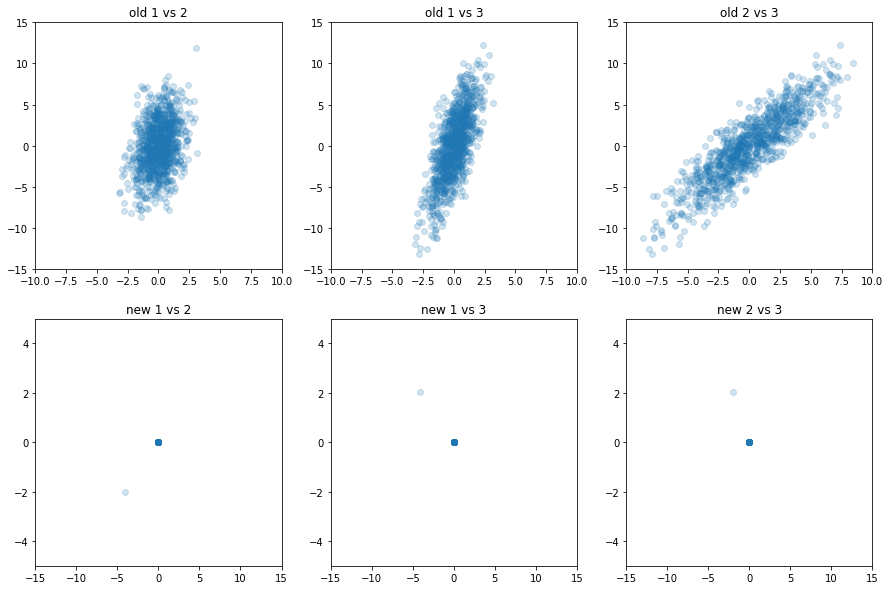

In [126]:
Xp = np.dot(df.T, U)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax1[0].scatter(df.iloc[:,0],df.iloc[:,1], alpha=0.2)
ax1[1].scatter(df.iloc[:,0],df.iloc[:,2], alpha=0.2)
ax1[2].scatter(df.iloc[:,1],df.iloc[:,2], alpha=0.2)

ax2[0].scatter(Xp[0,:],Xp[1,:], alpha=0.2)
ax2[1].scatter(Xp[0,:],Xp[2,:], alpha=0.2)
ax2[2].scatter(Xp[1,:],Xp[2,:], alpha=0.2)

for j in range(0,3):
    ax1[j].axis([-10,10,-15,15])
    ax2[j].axis([-15,15,-5,5])
    
ax1[0].set_title("old {} vs {}".format(1,2))
ax2[0].set_title("new {} vs {}".format(1,2))
ax1[1].set_title("old {} vs {}".format(1,3))
ax2[1].set_title("new {} vs {}".format(1,3))
ax1[2].set_title("old {} vs {}".format(2,3))
ax2[2].set_title("new {} vs {}".format(2,3))

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [127]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-01-20 19:24:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data’

magic04.data        100%[===================>]   1.41M  3.58MB/s    in 0.4s    

2023-01-20 19:24:59 (3.58 MB/s) - ‘data/magic04.data’ saved [1477391/1477391]

--2023-01-20 19:24:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: ‘data/magic04.names’

magic04.names       100%[===================>]   5.27K  --.-K

In [130]:
df = pd.read_csv('/content/data/magic04.data', names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'fClass'])
df.loc[df['fClass'] =='h', 'fClass'] = 0
df.loc[df['fClass'] =='g', 'fClass'] = 1
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist fClass  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

In [132]:
cov = df.cov()
l, V = np.linalg.eig(cov)
print ("Numpy eig:\n")
print ("eigenvalues:",l)
print ("eigenvectors:",V)

Numpy eig:

eigenvalues: [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04]
eigenvectors: [[ 3.27812305e-01  1.34406332e-01 -6.55078481e-02 -8.63988253e-01
  -9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [ 1.13810001e-01  5.38837224e-02  1.89938175e-02 -3.19766485e-01
   1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158421e-05]
 [ 3.06076690e-03 -6.59372017e-04 -1.05931761e-03 -6.93028658e-03
  -2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [-9.27109146e-04  2.58205308e-04  5.10399700e-04  2.60555110e-03
   1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [-5.21882399e-04  1.52710005e-04  2.94635944e-04  1.51275933e-03
   9.19340567e-04 -2.21501607e-05  1.81386903e-03  1.88001798e-01
  -5.19

In [138]:
dfa = np.asarray(df.values, dtype = np.float64, 
                        order ='C')

In [139]:
U, spectrum, Vt = np.linalg.svd(dfa)
l_svd = spectrum**2/(df.shape[0]-1)
V_svd = U
print ("\nSVD\n")
print ("eigenvalues:",l_svd)
print ("eigenvectors:",V_svd)


SVD

eigenvalues: [4.77412820e+04 4.19859012e+03 2.08452619e+03 1.33862372e+03
 8.21441118e+02 4.33666972e+02 1.17363167e+02 6.91708051e-01
 1.38314886e-01 3.39221929e-02 4.16487261e-04]
eigenvectors: [[-3.03246695e-03 -3.58950597e-03  8.45802728e-04 ... -8.22061049e-03
  -1.28592722e-02 -1.97276374e-02]
 [-6.80780859e-03 -4.93177676e-03  8.93495857e-04 ...  1.13920041e-02
   1.79231907e-02 -1.18898126e-02]
 [-1.00144262e-02 -3.78148418e-03  2.13679997e-02 ... -1.09658167e-04
  -9.01349589e-03 -1.29377059e-02]
 ...
 [-9.10733568e-03 -1.62250427e-03 -3.51824654e-03 ...  9.99543719e-01
  -4.19039733e-04  1.63242793e-04]
 [-1.43558207e-02  4.78092344e-03  1.80812309e-02 ... -4.28652866e-04
   9.97990668e-01 -7.98727185e-05]
 [-1.06045074e-02  2.77434844e-02  1.12912342e-02 ...  1.64401883e-04
  -1.00861084e-04  9.98559008e-01]]


In [140]:
found_variability = l/np.sum(l)

print('variability per principal component:',found_variability)

variability per principal component: [4.40472832e-01 2.57990739e-01 1.34983305e-01 8.88176474e-02
 4.08479378e-02 2.90265516e-02 7.85446025e-03 5.78367077e-06
 7.18728859e-07 2.57947768e-08]


In [142]:
#using svd ordered results
Lambda=np.diag(l_svd)
print ("Lambda {}".format(Lambda))
#cov matrix Trace
print ("Covariance trace:", cov.values.trace())
#lambda trace
print ("Lambda trace:", Lambda.trace())

print ("Percentage: {}".format(Lambda[0,0]/Lambda.trace()))

Lambda [[4.77412820e+04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.19859012e+03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.08452619e+03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.33862372e+03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.21441118e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.33666972e+02 0.00000000e+00 0.00000000e+00
  0.00000

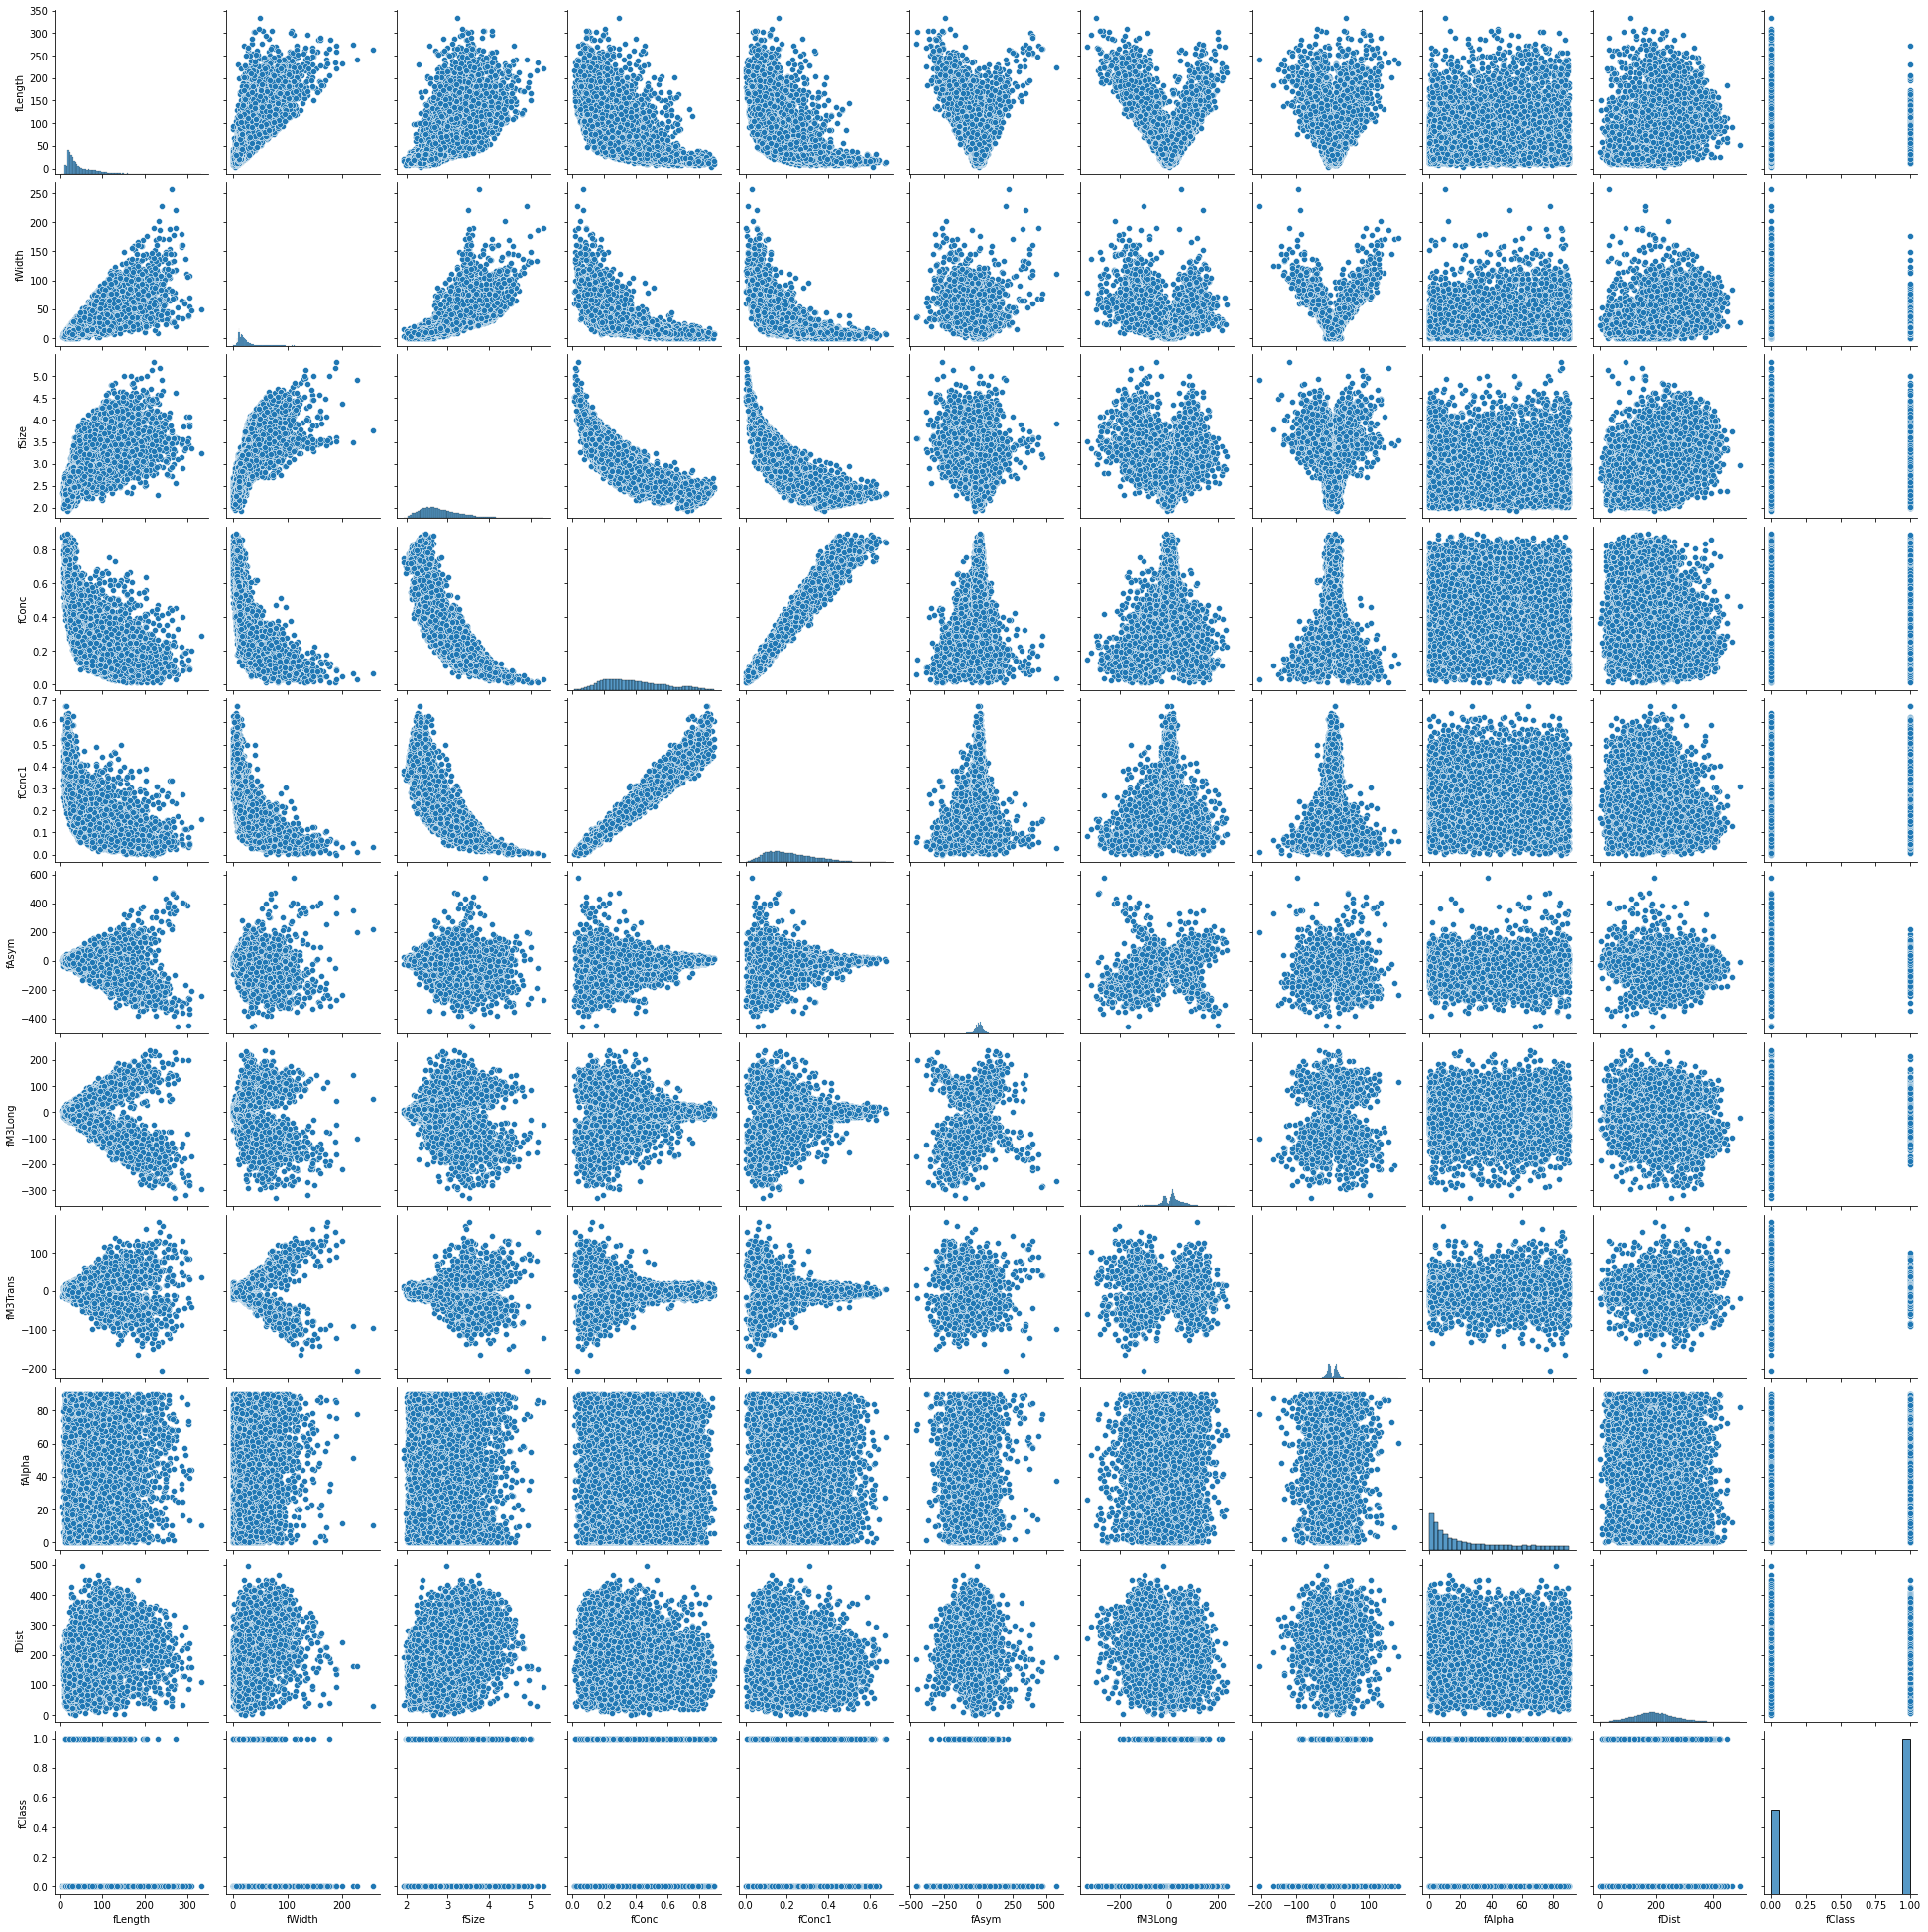

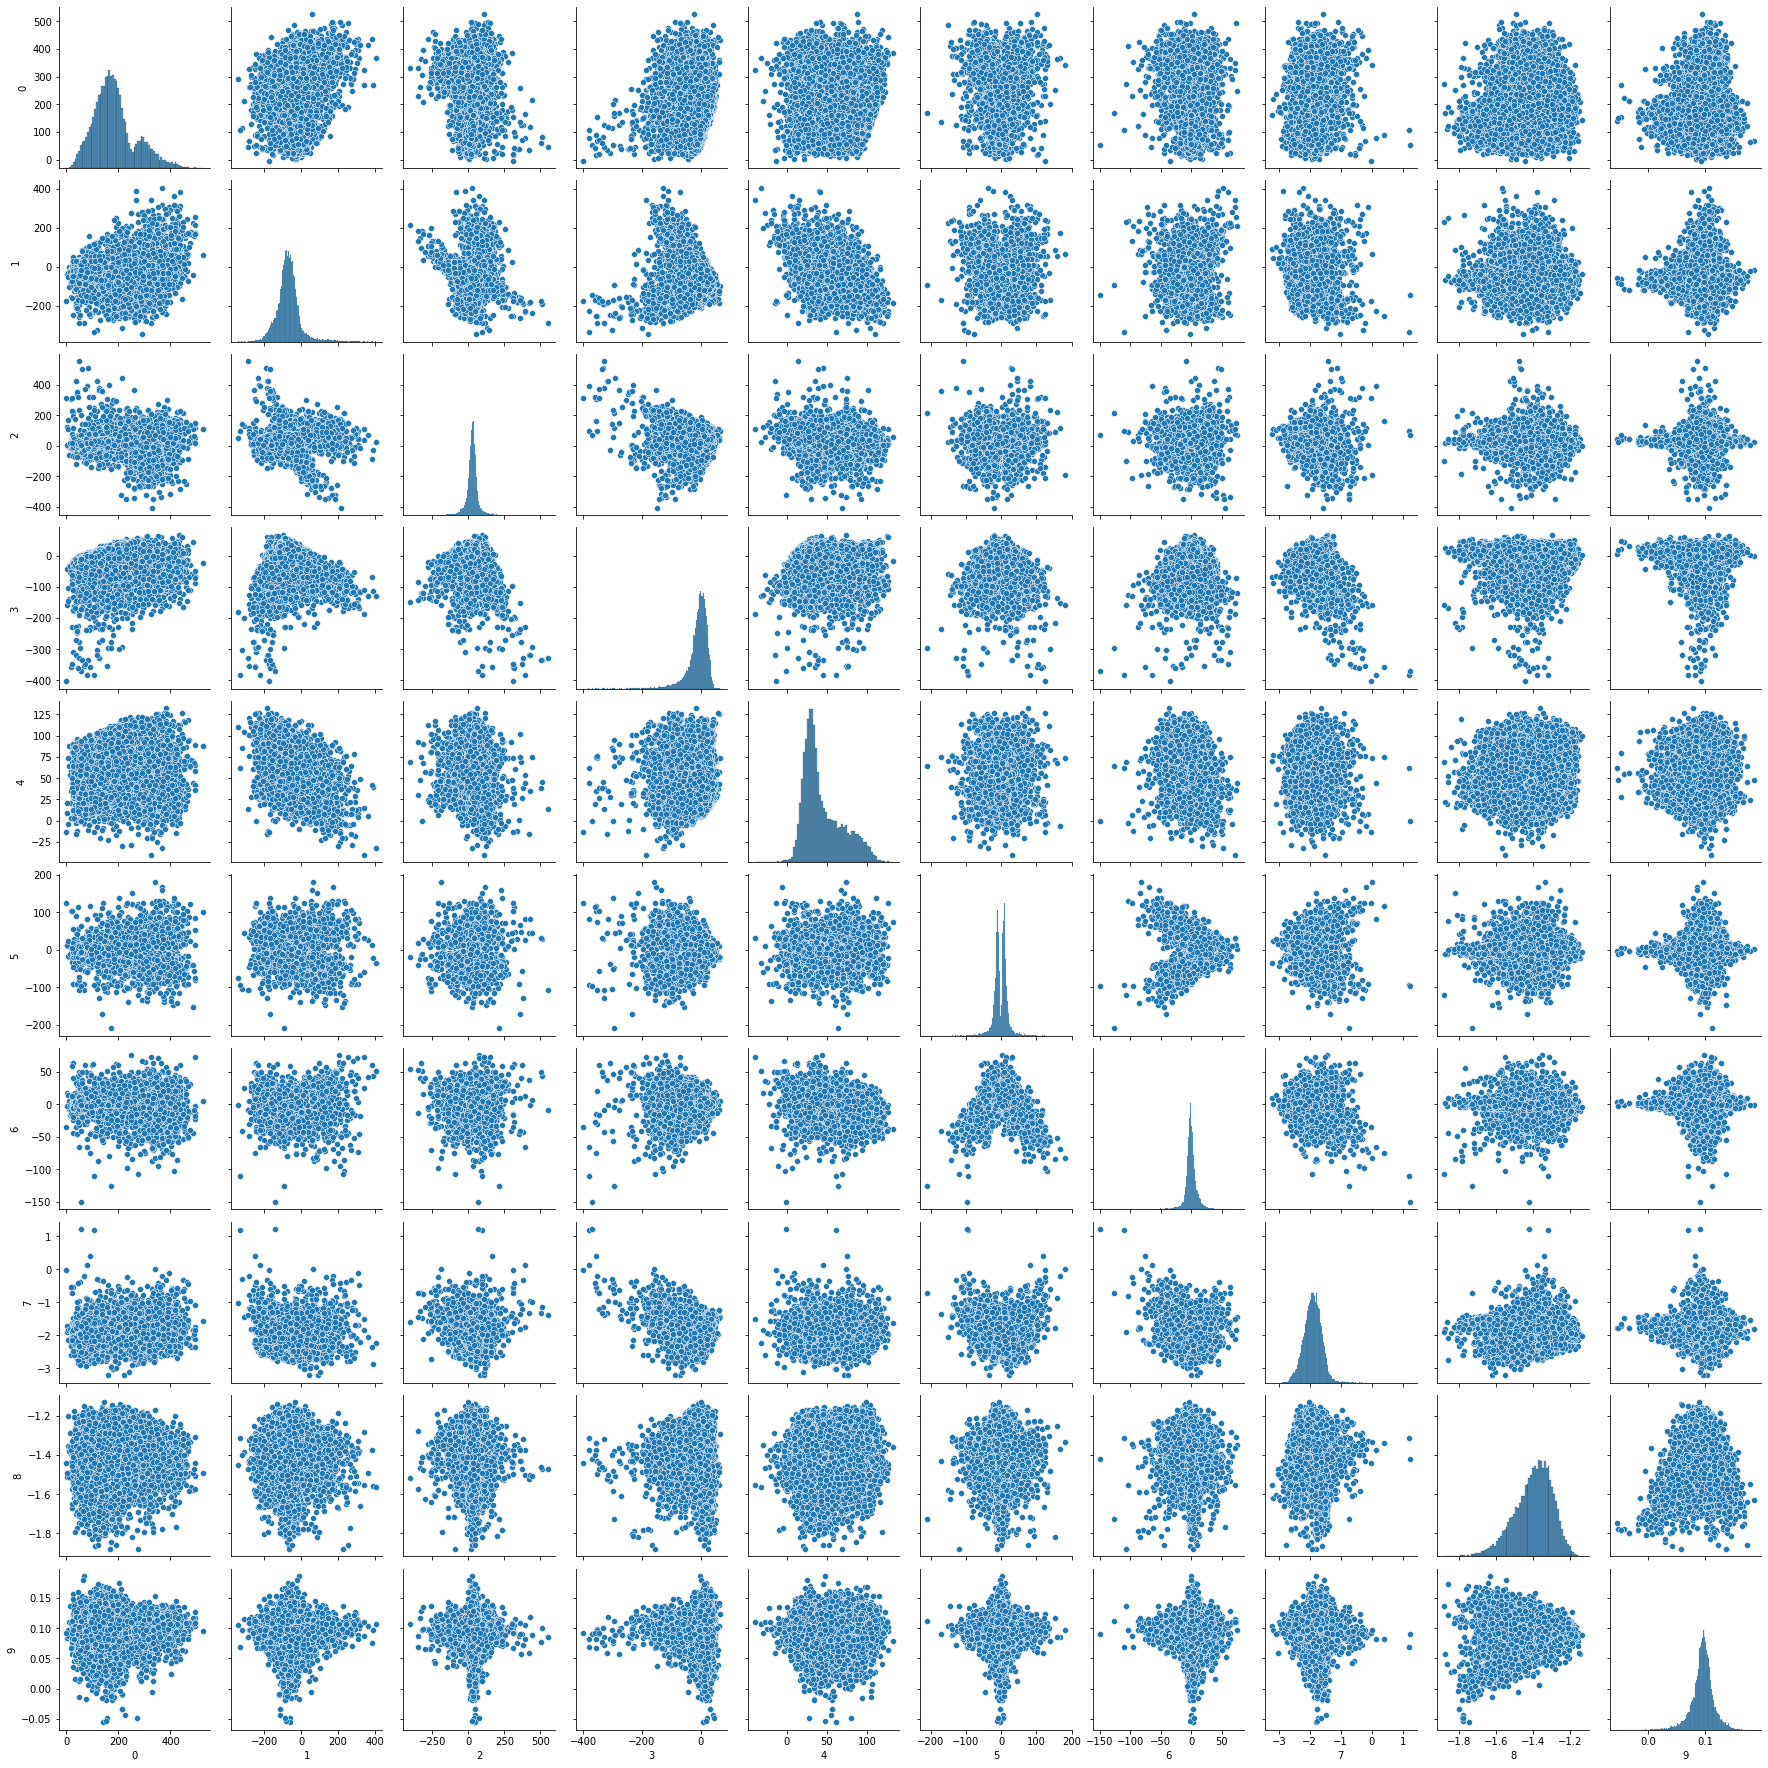

In [149]:
Xp = np.dot(dfa[:,0:10], V).T
sns.pairplot(df)
sns.pairplot(pd.DataFrame(Xp.T))